### Imports

In [1]:
from PIL import Image
from PIL import ImageFilter
import numpy as np
import copy
import matplotlib.pyplot as plt 
from numpy import linalg as LA
import scipy.io
import librosa
import IPython
from scipy import signal

### Parallax Problem

In [22]:
june = scipy.io.loadmat('D:/iu/Semester 2/MLSP/assignment2/data/june.mat')

In [23]:
june = np.array(june['june'])

In [24]:
dec = scipy.io.loadmat('D:/iu/Semester 2/MLSP/assignment2/data/december.mat')

In [25]:
dec = np.array(dec['december'])

In [26]:
disparity = dec[:,0]-june[:,0] 
np.min(disparity),np.max(disparity)

(5, 66)

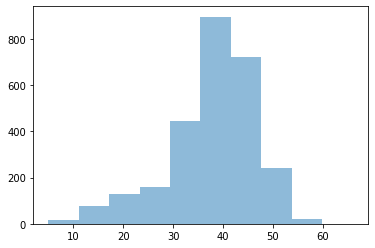

In [27]:
plt.hist(disparity,alpha = 0.5);

In [28]:
def kmeans(disp):
    n1_clust = []
    n2_clust = []
    thresh = 0.0001
    n1 = disp[np.random.randint(0,1350,1)]
    n2 = disp[np.random.randint(1351,2699,1)]
#     print("initialized centroids",n1,n2)
    flag = True
    for i in range(0,len(disp)):
        if np.abs(disp[i]-n1)<np.abs(disp[i]-n2):
            n1_clust.append(disp[i])
        else: n2_clust.append(disp[i])
    n1_clust = np.array(n1_clust)
    n2_clust = np.array(n2_clust)

    n1_mean = np.mean(n1_clust)
    n2_mean = np.mean(n2_clust)
#     print("new centroids", n1_mean,n2_mean)
    while flag:

        if np.abs(n1 - n1_mean) <= thresh and np.abs(n2 - n2_mean) <= thresh:
            flag = False
            return (n1_mean,n2_mean,np.std(n1_clust),np.std(n2_clust),len(n1_clust),len(n2_clust))
        
        else:
            n1_clust = []
            n2_clust = []
            n1,n2 = n1_mean, n2_mean
#             print("updated centroids",n1,n2)
            for i in range(0,len(disp)):
                if np.abs(disp[i]-n1)<np.abs(disp[i]-n2):
                    n1_clust.append(disp[i])
                else: n2_clust.append(disp[i])
                    
            n1_clust = np.array(n1_clust)
            n2_clust = np.array(n2_clust)
#             print(n1_clust.shape,n2_clust.shape)
            n1_mean = np.mean(n1_clust)
            n2_mean = np.mean(n2_clust)


In [29]:
n1,n2,std1,std2,len1,len2 = kmeans(disparity)

In [30]:
print("The means of the clusters are",n1,"and",n2)

The means of the clusters are 27.74271844660194 and 42.31183368869936
